# Clustering

In [3]:
import numpy as np
import pandas as pd
import sklearn.metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [4]:
crime_df = pd.read_csv("USArrests.csv")
crime_df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


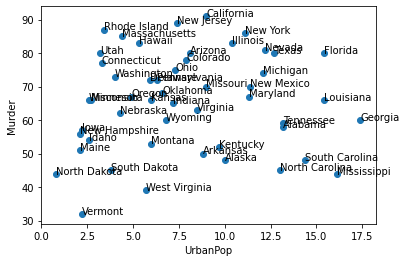

In [8]:
from sklearn.cluster import KMeans

X = crime_df.drop('State', axis=1)
y = crime_df['State']

plt.scatter(X['Murder'], X['UrbanPop'])

#add labels
for i, txt in enumerate(y):
    plt.annotate(txt, (X['Murder'][i], X['UrbanPop'][i]))
    
plt.xlabel('UrbanPop')
plt.ylabel('Murder')

plt.show()

#this is not useful, so use clustering

In [9]:
inertias = []
distortions = []

for k in range(1,10):
    #build and fit the model
    model = KMeans(n_clusters=k).fit(X)
    
    #average of squared distance from cluster center to the data points
    distortion = (np.min(cdist(X,model.cluster_centers_,
                    'euclidean'), axis=1))/X.shape[0]
    
    distortions.append(distortion)
    
    inertia = model.inertia_
    inertias.append(inertia)

In [13]:
inertias = []
distortions = []

for k in range(1,10):
    #build and fit the model
    model = KMeans(n_clusters=k).fit(X)
    
    #calculate distortion
    #average of squared distance from cluster center to data points
    #cdist() - calculate the distance from each point to cluster centers
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html

    distortion = sum(np.min(cdist(X,model.cluster_centers_, 'euclidean'), axis=1))/X.shape[0]
    # add to list
    distortions.append(distortion)
    
    inertia = model.inertia_
    inertias.append(inertia)

Text(0.5, 1.0, 'Elbow Method with Distortion')

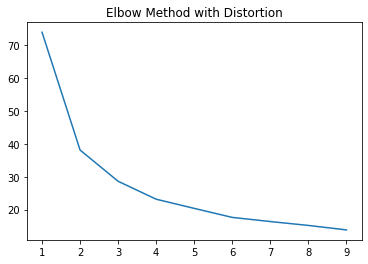

In [14]:
plt.plot(range(1,10), distortions)
plt.title('Elbow Method with Distortion')

Text(0.5, 1.0, 'Elbow Method with Distortion')

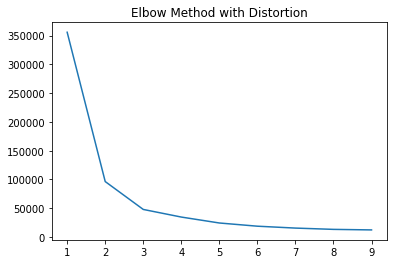

In [12]:
plt.plot(range(1,10), inertias)
plt.title('Elbow Method with Distortion')

# Hierarchical

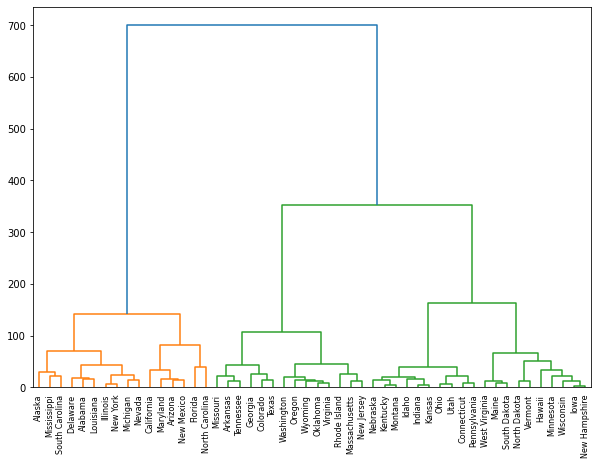

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X, 'ward')
plt.figure(figsize=(10,7))
dendro = dendrogram(linked, labels=list(y))
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2])

TypeError: 'str' object is not callable

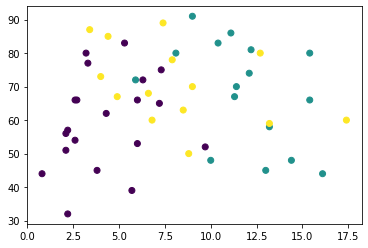

In [20]:
plt.scatter(X['Murder'],X['UrbanPop'], c=cluster.labels_)
for i, txt in enumerate(y):
    plt.annotate(txt(X['Murder'][i], X['UrbanPop']))

In [21]:
crime_df['cluster']=cluster.labels_
crime_df.tail()

,State,Murder,Assault,UrbanPop,Rape,cluster
45,Virginia,8.5,156,63,20.7,2
46,Washington,4.0,145,73,26.2,2
47,West Virginia,5.7,81,39,9.3,0
48,Wisconsin,2.6,53,66,10.8,0
49,Wyoming,6.8,161,60,15.6,2


# Dimensionality Reduction

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

diabetes_df = pd.read_csv("../week_13/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

#logistic regression
clr = LogisticRegression(random_state = 24).fit(X_train, y_train)

#predict
y_pred = clr.predict(X_test)
print(y_pred)

print("Accuracy:", clr.score(X_test, y_test))

[0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1
 0 0 0 1 0 1 1 1 0]
Accuracy: 0.7359307359307359


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


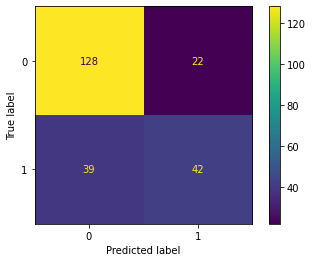

In [27]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clr,X_test,y_test)

In [29]:
from sklearn.decomposition import TruncatedSVD

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

svd = TruncatedSVD(n_components=6)

X_train_svd=svd.fit_transform(X_train)
X_test_svd=svd.fit_transform(X_test)

clr = LogisticRegression(random_state=24).fit(X_train_svd, y_train)
clr.score(X_test_svd, y_test)

0.70995670995671

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


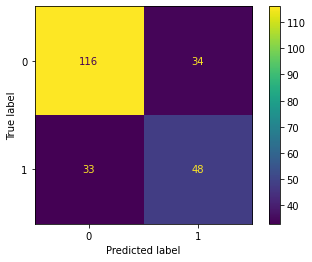

In [30]:
plot_confusion_matrix(clr,X_test_svd,y_test)